<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> CIENCIA DE DATOS E INTELIGENCIA DE NEGOCIOS </font> </center>

# <center> <font color= #000047> Tarea 2: Análisis Exploratorio de Datos (EDA) y Limpieza de Datos </font> </center>


<h1> Nombre: Carlos Enrique Ruiz Moreno </h1>
<hr>   

Como parte de una exploración inicial de la información dentro de una base de datos, se debe de hacer un reporte de calidad de los datos, donde se muestra la información más relevante y después realizar la limpieza de los datos. Esta tarea consiste en realizar un EDA y limpieza de datos.

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA IMPORTANTE!</strong> Asegúrese de escribir su nombre, y el código en las celdas comentadas.</div>

**1. Considere los archivos “Accidents_UK_2015.csv”, “Casualties_UK_2015.csv” y “Vehicles_UK_2015.csv” donde se encuentra información sobre los accidentes automovilísticos que fueron reportados durante el año 2015 en el reino unido, utilizando estos tres archivos realice lo siguiente:**

> 1. Obtenga los reportes de calidad de datos de cada uno de los archivos. Describa brevemente las tablas obtenidas resaltando los puntos o características que considere más importantes (ejemplo: número total de datos, tipos de datos, datos faltantes, etc..). 

> 2. Incluir un comparativo del número de accidentes y el número de heridos que se encuentran en el archivo “Acdidents_UK_2015.csv”. 

> 3. Realizar un histograma de las localizaciones de los accidentes, y comentar estos histogramas. 

> 4. Determinar el día de la semana en el que ocurren el mayor y el menor número de accidentes. 

> 5. Del archivo “Casualties_UK_2015.csv”, determinar el número de hombres y de mujeres que resultaron heridos en los accidentes. 

> 6. Del archivo “Vehicles_UK_2015.csv”, obtenga el número de hombres y mujeres que conducían en los accidentes. 

> 7. Determine la edad promedio que las personas que conducían y que se accidentaron más y de las que se accidentaron menos. 

<div class="alert alert-danger" style="margin: 10px"><strong>NOTA:</strong> Todas las figuras deben de estar comentadas o descritas.</div>


In [31]:
# Obtenga los reportes de calidad de datos de cada uno de los archivos. Describa brevemente las tablas obtenidas resaltando los puntos o características que considere más importantes (ejemplo: número total de datos, tipos de datos, datos faltantes, etc..)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CDIN import CDIN as cd
import string

acc = pd.read_csv('../Data/Accidents_2015.csv')
veh = pd.read_csv('../Data/Vehicles_2015.csv')
cas = pd.read_csv('../Data/Casualties_2015.csv')

acc.head(5)

C:\Users\CarlosRuizMoreno\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [2]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               140056 non-null  object 
 1   Location_Easting_OSGR                        140029 non-null  float64
 2   Location_Northing_OSGR                       140029 non-null  float64
 3   Longitude                                    140029 non-null  float64
 4   Latitude                                     140029 non-null  float64
 5   Police_Force                                 140056 non-null  int64  
 6   Accident_Severity                            140056 non-null  int64  
 7   Number_of_Vehicles                           140056 non-null  int64  
 8   Number_of_Casualties                         140056 non-null  int64  
 9   Date                                         140056 non-nul

In [3]:
veh.head(5)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,6,1,45,7,1794,1,11,-1,1,-1
1,201506E098766,1,9,0,9,0,8,0,0,0,...,6,2,25,5,1582,2,1,-1,-1,-1
2,201506E098766,2,9,0,18,0,8,0,0,0,...,6,1,51,8,-1,-1,-1,-1,1,-1
3,201506E098777,1,20,0,4,0,0,0,0,0,...,1,1,50,8,4462,2,1,-1,1,-1
4,201506E098780,1,9,0,15,0,1,0,0,0,...,6,1,27,6,1598,2,-1,-1,1,-1


In [4]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257845 entries, 0 to 257844
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    257845 non-null  object
 1   Vehicle_Reference                 257845 non-null  int64 
 2   Vehicle_Type                      257845 non-null  int64 
 3   Towing_and_Articulation           257845 non-null  int64 
 4   Vehicle_Manoeuvre                 257845 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  257845 non-null  int64 
 6   Junction_Location                 257845 non-null  int64 
 7   Skidding_and_Overturning          257845 non-null  int64 
 8   Hit_Object_in_Carriageway         257845 non-null  int64 
 9   Vehicle_Leaving_Carriageway       257845 non-null  int64 
 10  Hit_Object_off_Carriageway        257845 non-null  int64 
 11  1st_Point_of_Impact               257845 non-null  int64 
 12  Wa

In [5]:
cas.head(5)

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201597UA71710,2,1,1,2,75,10,3,0,0,0,0,0,9,3,-1
1,201597UA71810,2,1,2,2,63,9,2,0,0,0,4,0,11,3,-1
2,201597UA71810,2,2,2,2,75,10,2,0,0,0,4,0,11,1,-1
3,201597UA71810,2,3,2,1,78,11,2,0,0,0,4,0,11,1,-1
4,201597UA71810,2,4,2,1,67,10,2,0,0,0,4,0,11,1,-1


In [6]:
cas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186189 entries, 0 to 186188
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      186189 non-null  object
 1   Vehicle_Reference                   186189 non-null  int64 
 2   Casualty_Reference                  186189 non-null  int64 
 3   Casualty_Class                      186189 non-null  int64 
 4   Sex_of_Casualty                     186189 non-null  int64 
 5   Age_of_Casualty                     186189 non-null  int64 
 6   Age_Band_of_Casualty                186189 non-null  int64 
 7   Casualty_Severity                   186189 non-null  int64 
 8   Pedestrian_Location                 186189 non-null  int64 
 9   Pedestrian_Movement                 186189 non-null  int64 
 10  Car_Passenger                       186189 non-null  int64 
 11  Bus_or_Coach_Passenger              186

In [7]:
cd.dqr(acc)

,Nombres,Tipo_Dato,Datos_Faltantes,Valores_Presentes,Num_Valores_Unicos,Min,Max,Categorica
Accident_Index,Accident_Index,object,0,140056,140056,NaN,NaN,True
Location_Easting_OSGR,Location_Easting_OSGR,float64,27,140029,89880,70860,655282,False
Location_Northing_OSGR,Location_Northing_OSGR,float64,27,140029,93322,10628,1.19792e+06,False
Longitude,Longitude,float64,27,140029,133316,-7.42291,1.75844,False
Latitude,Latitude,float64,27,140029,131977,49.9156,60.6611,False
Police_Force,Police_Force,int64,0,140056,51,1,98,False
Accident_Severity,Accident_Severity,int64,0,140056,3,1,3,False
Number_of_Vehicles,Number_of_Vehicles,int64,0,140056,16,1,37,False
Number_of_Casualties,Number_of_Casualties,int64,0,140056,22,1,38,False
Date,Date,object,0,140056,365,01/01/2015,31/12/2015,True


De la tabla de accidentes los datos que podrían resultar relevantes para el estudios son los siguientes: número de accidentes (casos únicos), fecha y hora del accidente, autos involucrados, límite de velocidad y el clima. Todos estos datos pueden tener una correlación mayor con los accidentes automovilísticos.

In [8]:
cd.dqr(veh)

,Nombres,Tipo_Dato,Datos_Faltantes,Valores_Presentes,Num_Valores_Unicos,Min,Max,Categorica
Accident_Index,Accident_Index,object,0,257845,140056,201501BS70001,2015984141415,True
Vehicle_Reference,Vehicle_Reference,int64,0,257845,37,1,37,False
Vehicle_Type,Vehicle_Type,int64,0,257845,21,-1,98,False
Towing_and_Articulation,Towing_and_Articulation,int64,0,257845,7,-1,5,False
Vehicle_Manoeuvre,Vehicle_Manoeuvre,int64,0,257845,19,-1,18,False
Vehicle_Location-Restricted_Lane,Vehicle_Location-Restricted_Lane,int64,0,257845,11,-1,9,False
Junction_Location,Junction_Location,int64,0,257845,10,-1,8,False
Skidding_and_Overturning,Skidding_and_Overturning,int64,0,257845,7,-1,5,False
Hit_Object_in_Carriageway,Hit_Object_in_Carriageway,int64,0,257845,13,-1,12,False
Vehicle_Leaving_Carriageway,Vehicle_Leaving_Carriageway,int64,0,257845,10,-1,8,False


De la tabla de vehículos, los campos que podrían resultar de interés para un estudio podrían ser lo siguientes: sexo del conductor y edad del conductor.

In [9]:
cd.dqr(cas)

,Nombres,Tipo_Dato,Datos_Faltantes,Valores_Presentes,Num_Valores_Unicos,Min,Max,Categorica
Accident_Index,Accident_Index,object,0,186189,140056,201501BS70001,2015984141415,True
Vehicle_Reference,Vehicle_Reference,int64,0,186189,28,1,32,False
Casualty_Reference,Casualty_Reference,int64,0,186189,38,1,38,False
Casualty_Class,Casualty_Class,int64,0,186189,3,1,3,False
Sex_of_Casualty,Sex_of_Casualty,int64,0,186189,3,-1,2,False
Age_of_Casualty,Age_of_Casualty,int64,0,186189,102,-1,104,False
Age_Band_of_Casualty,Age_Band_of_Casualty,int64,0,186189,12,-1,11,False
Casualty_Severity,Casualty_Severity,int64,0,186189,3,1,3,False
Pedestrian_Location,Pedestrian_Location,int64,0,186189,12,-1,10,False
Pedestrian_Movement,Pedestrian_Movement,int64,0,186189,11,-1,9,False


De la tabla de damnificados los campos que nos interesan son los siguientes: sexo, edad y severidad.

In [10]:
# Incluir un comparativo del número de accidentes y el número de heridos que se encuentran en el archivo “Acdidents_UK_2015.csv”. 
x = acc['Number_of_Casualties'].sum()
print('El número promedio de heridos por accidentes es ',x/acc['Accident_Index'].count())


El número promedio de heridos por accidentes es  1.3293896727023475


C:\Users\CarlosRuizMoreno\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\CarlosRuizMoreno\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.1000e+01, 7.2100e+02, 2.5320e+03, 8.5630e+03, 1.6287e+04,
        2.4265e+04, 2.8155e+04, 4.0133e+04, 1.4790e+04, 4.5620e+03]),
 array([ 70860. , 129302.2, 187744.4, 246186.6, 304628.8, 363071. ,
        421513.2, 479955.4, 538397.6, 596839.8, 655282. ]),
 <a list of 10 Patch objects>)

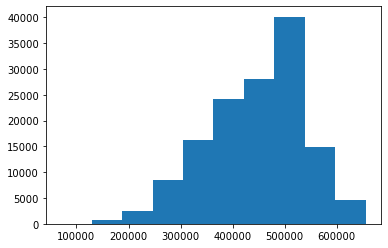

In [11]:
# Realizar un histograma de las localizaciones de los accidentes, y comentar estos histogramas. 
plt.hist(acc['Location_Easting_OSGR'], )


In [12]:
# Determinar el día de la semana en el que ocurren el mayor y el menor número de accidentes. 
acc.groupby(['Day_of_Week'])['Number_of_Vehicles'].sum().sort_values(ascending=False)


Day_of_Week
6    41565
5    39815
3    39747
4    39736
2    37026
7    32571
1    27385
Name: Number_of_Vehicles, dtype: int64

In [13]:
# Del archivo “Casualties_UK_2015.csv”, determinar el número de hombres y de mujeres que resultaron heridos en los accidentes. 

cas.groupby(['Sex_of_Casualty'])['Accident_Index'].count()


Sex_of_Casualty
-1        61
 1    110299
 2     75829
Name: Accident_Index, dtype: int64

In [14]:
# Del archivo “Vehicles_UK_2015.csv”, obtenga el número de hombres y mujeres que conducían en los accidentes. 
veh.groupby(['Sex_of_Driver'])['Accident_Index'].count()



Sex_of_Driver
-1        19
 1    169251
 2     72046
 3     16529
Name: Accident_Index, dtype: int64

In [15]:
# Determine la edad promedio que las personas que conducían y que se accidentaron más y de las que se accidentaron menos. 
veh.groupby(['Age_of_Driver'])['Accident_Index'].count().sort_values(ascending=False)



Age_of_Driver
-1     29828
 30     6577
 25     6374
 24     5865
 23     5779
       ...  
 4        19
 3         9
 1         2
 97        2
 96        1
Name: Accident_Index, Length: 96, dtype: int64

**1. En clase se mostró un ejemplo de la limpieza de una base datos ejemplo “dirty_data.csv”, de la que se logró hacer la estandarización de los nombres de las personas, y las fechas de nacimiento. En la columna “ssn” se requiere los siguientes cambios:**
>1. Cada registro solo debe de contener números.

>2. Cada registro debe de contener 9 dígitos para ser un registro válido, de otra forma el registro deberá contener la palabra “missing”.

>3. No se quieren espacios, ni guiones o algún otro símbolo especial en cada registro.



In [16]:
data = pd.read_csv('../Data/dirty_data.csv')
data

,age,birth_date,marital,people,ssn
0,24,02/12/1954,soltero,"Alfonso A,guilar",6439
1,35,05/07/1958,casado,edu6ardo Castillo,689 24 9939
2,46,01-26-1956,Soltero,jocelyn medel,306-05-2792
3,57,19xx-10-23,divorciado,VICTOR ramos _ _ _,99922a45832
4,10,02/12/0054,SOLTERO,CARLOS EDUARDO; OCHOA ARAMBULA,6439
5,25,05/07/1958,CASado,JOSE MANUEL OCHOA CARDENAS,689 24 9939
6,63,01-26-1956,Soltero,JUAN MARIO; OCHOA NAVARRO,306-05-2792
7,59,19xx?10-23,DIVORCIADO,LUIS ONTANEDA MIJARES,99922a45832
8,69,02/12/1954,soltero,EDUARDO OMAR ORTEGA RAMIREZ,NaN
9,59,05/07/1958,NaN,JOSE ALEJANDRO& PRECIADO GANDARA,6439


In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
data['ssn'].apply(cd.remove_punctuation)

0            6439
1     689 24 9939
2     306-05-2792
3     99922a45832
4            6439
5     689 24 9939
6     306-05-2792
7     99922a45832
8             NaN
9            6439
10    689 24 9938
11    306-06-2792
12    99922a45845
13        missing
Name: ssn, dtype: object

In [40]:
# Cada registro debe de contener 9 dígitos para ser un registro válido, de otra forma el registro es “missing”
cadena = 'Carlos - Ruiz -'
cd.remove_punctuation(cadena)

'Carlos - Ruiz -'

In [ ]:
# No se quieren espacios, ni guiones o algún otro símbolo especial en cada registro.

**2. Utiliza las mismas funciones para limpiar la base de datos llamada “dirty_Info_Alumnos_v1.csv”. El ejercicio consiste en normalizar toda la tabla teniendo encuentra las siguientes consideraciones:**
>1. Dejar los nombres correctos en mayúsculas.

>2. Eliminar todos los caracteres especiales de la columna teléfono.

>3. Cuando no se tenga la longitud de 10 dígitos en el teléfono, se considerará el dato como: “unknown”.

>4. Dejar solo números en la columna semestre.

>5. Si el número de expediente no tiene 6 dígitos considerarlo como “missing”.

In [ ]:
# Dejar los nombres correctos en mayúsculas.

In [1]:
# Eliminar todos los caracteres especiales de la columna teléfono.

In [ ]:
# Cuando no se tenga la longitud de 10 dígitos en el teléfono, se considerará el dato como: “unknown”.

In [ ]:
# Dejar solo números en la columna semestre.

In [ ]:
# Si el número de expediente no tiene 6 dígitos considerarlo como “missing”.